# Lectura y ploteo de señales de EEG

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import os

# Señal EEG obtenida con Bitalino

## Abrimos el archivo txt para ver  el contenido

In [ ]:
f = open("eegSignal.txt","r")
raw_data = f.readline()  # con f.read() leemos todo el contenido
f.close()

raw_data

'# OpenSignals Text File Format. Version 1\n'

In [ ]:
#Definimos la frecuencia
x = 1000
print(x)

1000


In [ ]:
Fs = float(x)
Ts=1/Fs

print(f" Fs={Fs} hz\n Ts={Ts} s")

 Fs=1000.0 hz
 Ts=0.001 s


## Leemos el archivo excluyendo las primeras filas del archivo

In [ ]:
array = np.genfromtxt("eegSignal.txt", delimiter="\t",skip_header = 3, missing_values= 0)
array

array([[  0.,   0.,   0., ...,   0., 415.,  nan],
       [  1.,   0.,   0., ...,   0., 414.,  nan],
       [  2.,   0.,   0., ...,   0., 417.,  nan],
       ...,
       [  3.,   0.,   0., ...,   0., 419.,  nan],
       [  4.,   0.,   0., ...,   0., 411.,  nan],
       [  5.,   0.,   0., ...,   0., 428.,  nan]])

In [ ]:
#Extraemos la columna de la señal
signal = array[:, 5]
signal

array([415., 414., 417., ..., 419., 411., 428.])

In [ ]:
#Obtenemos la longitud de la señal
n = len(signal)
n

260550

In [ ]:
#Creamos un vector tiempo conociendo n y Ts
n = 30000
t = np.arange(0,n*Ts,Ts)
len(t)

30000

In [ ]:
signal2 = signal[0:30000] #Obtenemos los primeros 2000 valores de nuestra señal
len(signal2)

30000

In [ ]:
signal3 = signal[30000:80000]
n = 50000
t2 = np.arange(0,n*Ts,Ts)
len(signal3)

50000

In [ ]:
signal4 = signal[80000:110000]
len(signal4)

30000

In [ ]:
signal5 = signal[110000:260000]
n = 150000
t3 = np.arange(0,n*Ts,Ts)
len(t3)

150000

## Ploteamos la lectura

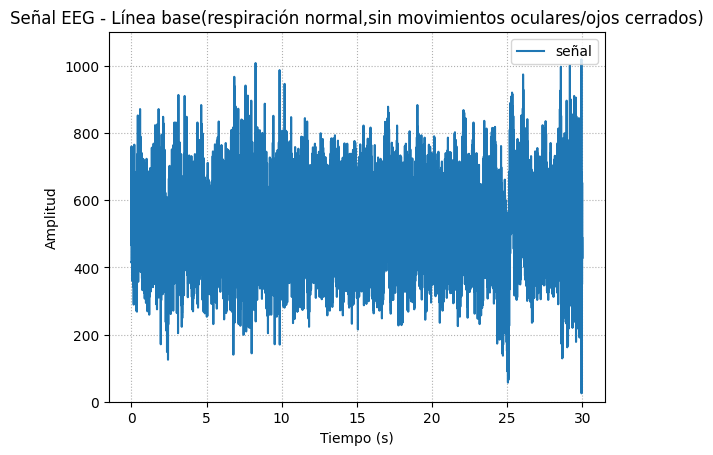

In [ ]:
plt.plot(t, signal2, label="señal")      # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.ylim(0, 1100)
plt.legend(loc="upper right")
plt.title("Señal EEG - Línea base(respiración normal,sin movimientos oculares/ojos cerrados)")
plt.show()

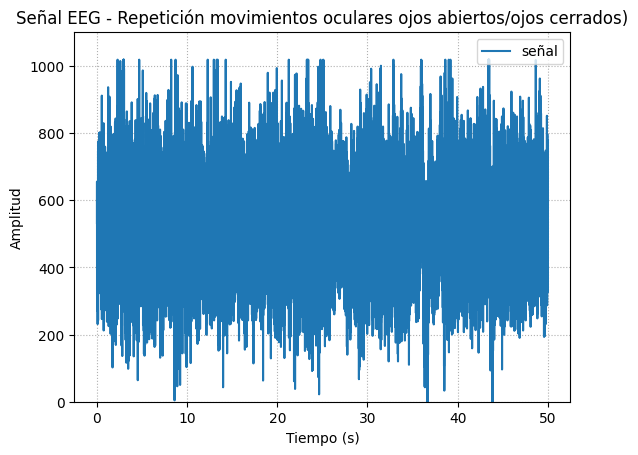

In [ ]:
plt.plot(t2, signal3, label="señal")      # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.ylim(0, 1100)
plt.legend(loc="upper right")
plt.title("Señal EEG - Repetición movimientos oculares ojos abiertos/ojos cerrados)")
plt.show()

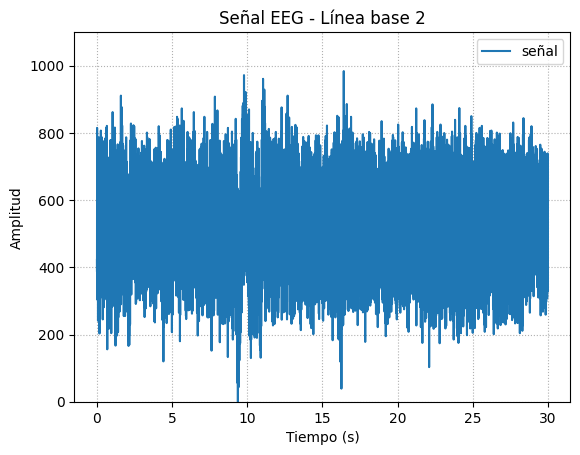

In [ ]:
plt.plot(t, signal4, label="señal")      # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.ylim(0, 1100)
plt.legend(loc="upper right")
plt.title("Señal EEG - Línea base 2")
plt.show()

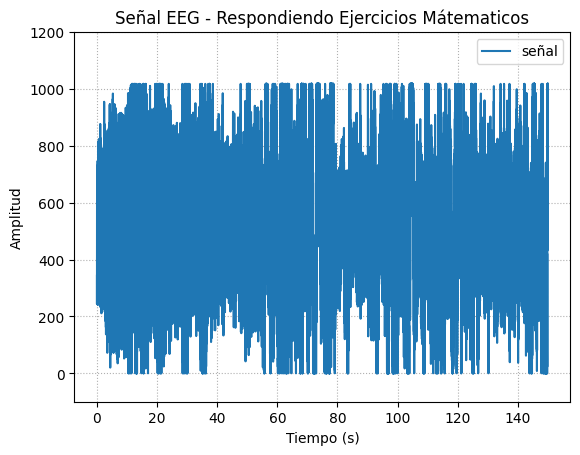

In [ ]:
plt.plot(t3, signal5, label="señal")      # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.ylim(-100, 1200)
plt.legend(loc="upper right")
plt.title("Señal EEG - Respondiendo Ejercicios Mátematicos")
plt.show()

## La forma de sabes la frecuencia de la señal es viendo en el dominio de la frecuencia

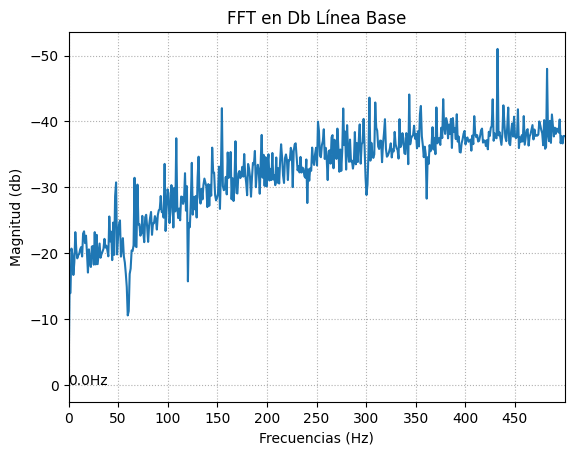

In [ ]:
N = 2**10                                     # 10 bits, 0-1023

#signal1 = array[:,1]

signal_fft = np.fft.fft(signal2, N)           # fft magtinud
signal_fft = np.round(np.abs(signal_fft),3)[0:N//2] # nos quedamos con los componente de la derecha de la FFT
signal_aux = signal_fft/signal_fft.max()     # hallamos el maximo para pasar la magnitud a escala db

with np.errstate(divide='ignore'):
    signal_fft_db = 10*np.log10(signal_aux)  # , out=signal_aux, where=signal_aux >= 0 para evitar division por zero

F_list = np.linspace(0,Fs/2, N//2)
F = np.round(F_list[np.argmax(signal_fft_db)], 1)   # argmax, encuentra el argumento max en un array

plt.plot(F_list, signal_fft_db)  #10 * np.log10(P / Pref) , decibelios
plt.text(F,0, f"{F}Hz")
plt.grid(linestyle=":")
plt.ylabel("Magnitud (db)")
plt.xlabel("Frecuencias (Hz)")
plt.title("FFT en Db Línea Base")
plt.xlim([0,500])
plt.gca().invert_yaxis()
plt.xticks(np.arange(0,500,50))
plt.show()

# Señal EEG obtenida con Ultra Cortex

In [ ]:
canal1 = []
canal2 = []
canal3 = []
canal4 = []
canal5 = []
canal6 = []
canal7 = []
canal8 = []

In [ ]:
with open("/content/eegSignalUC.txt", "r") as archivo:
    # Saltamos los encabezados
    archivo.readline()
    archivo.readline()
    archivo.readline()
    archivo.readline()
    archivo.readline()
    for linea in archivo:
        # Dividimos las líneas de las columnas utilizando la coma como separador
        columnas = linea.strip().split(", ")
        canal1.append(float(columnas[1]))
        canal2.append(float(columnas[2]))
        canal3.append(float(columnas[3]))
        canal4.append(float(columnas[4]))
        canal5.append(float(columnas[5]))
        canal6.append(float(columnas[6]))
        canal7.append(float(columnas[7]))
        canal8.append(float(columnas[8]))

In [ ]:
#Etapa de Conversión a mV
canal1 = np.multiply(canal1, 1000)
canal2 = np.multiply(canal2, 1000)
canal3 = np.multiply(canal3, 1000)
canal4 = np.multiply(canal4, 1000)
canal5 = np.multiply(canal5, 1000)
canal6 = np.multiply(canal6, 1000)
canal7 = np.multiply(canal7, 1000)
canal8 = np.multiply(canal8, 1000)

In [ ]:
#Creamos un vector tiempo
x=250 #La Fs es 250
Fs2 = float(x)
Ts2=1/Fs2
n = len(canal1)
time = np.arange(0,n*Ts2,Ts2)
len(time)

91631

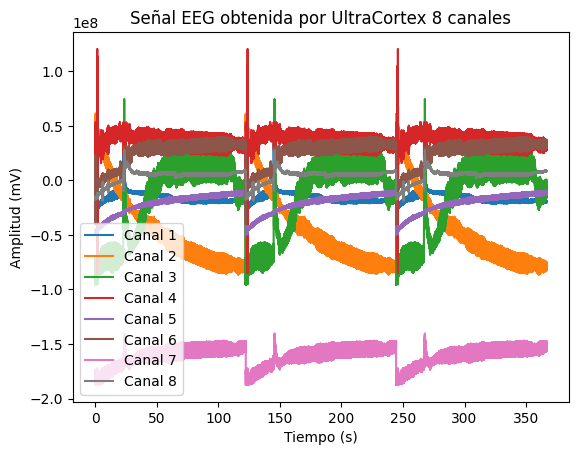

In [107]:
plt.figure()
# Crea un gráfico de línea para el canal seleccionado
plt.plot(time, canal1[:len(canal1)], label='Canal 1')
plt.plot(time, canal2[:len(canal2)], label='Canal 2')
plt.plot(time, canal3[:len(canal3)], label='Canal 3')
plt.plot(time, canal4[:len(canal4)], label='Canal 4')
plt.plot(time, canal5[:len(canal5)], label='Canal 5')
plt.plot(time, canal6[:len(canal6)], label='Canal 6')
plt.plot(time, canal7[:len(canal7)], label='Canal 7')
plt.plot(time, canal8[:len(canal8)], label='Canal 8')
plt.title('Señal EEG obtenida por UltraCortex 8 canales')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.legend()
plt.show()

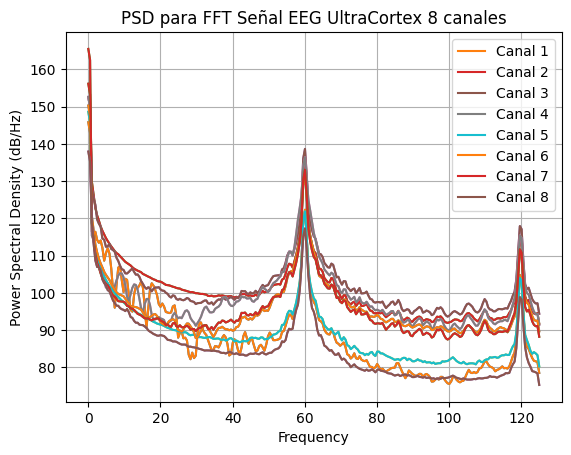

In [110]:
psd1, freq1 = plt.psd(canal1, 512, 250)
psd1 = np.where(psd1 > 0, psd1, 1e-16)  # Agregar un valor pequeño a los valores iguales a cero
plt.plot(freq1, 10 * np.log10(psd1), label="Canal 1")

psd2, freq2 = plt.psd(canal2, 512, 250)
psd2 = np.where(psd2 > 0, psd2, 1e-16)  # Agregar un valor pequeño a los valores iguales a cero
plt.plot(freq2, 10 * np.log10(psd2), label="Canal 2")

psd3, freq3 = plt.psd(canal3, 512, 250)
psd3 = np.where(psd3 > 0, psd3, 1e-16)  # Agregar un valor pequeño a los valores iguales a cero
plt.plot(freq3, 10 * np.log10(psd3), label="Canal 3")

psd4, freq4 = plt.psd(canal4, 512, 250)
psd4 = np.where(psd4 > 0, psd4, 1e-16)  # Agregar un valor pequeño a los valores iguales a cero
plt.plot(freq4, 10 * np.log10(psd4), label="Canal 4")

psd5, freq5 = plt.psd(canal5, 512, 250)
psd5 = np.where(psd5 > 0, psd5, 1e-16)  # Agregar un valor pequeño a los valores iguales a cero
plt.plot(freq5, 10 * np.log10(psd5), label="Canal 5")

psd6, freq6 = plt.psd(canal6, 512, 250)
psd6 = np.where(psd6 > 0, psd6, 1e-16)  # Agregar un valor pequeño a los valores iguales a cero
plt.plot(freq6, 10 * np.log10(psd6), label="Canal 6")

psd7, freq7 = plt.psd(canal7, 512, 250)
psd7 = np.where(psd7 > 0, psd7, 1e-16)  # Agregar un valor pequeño a los valores iguales a cero
plt.plot(freq7, 10 * np.log10(psd7), label="Canal 7")

psd8, freq8 = plt.psd(canal8, 512, 250)
psd8 = np.where(psd8 > 0, psd8, 1e-16)  # Agregar un valor pequeño a los valores iguales a cero
plt.plot(freq8, 10 * np.log10(psd8), label="Canal 8")
plt.legend(loc="upper right")
plt.title("PSD para FFT Señal EEG UltraCortex 8 canales")
plt.show()